# **Machine Learning - Lab-Project**

---

##### Lab-Project of **Group 5**.

**Members:**
- Ammar Darwich <br>
- Raghad Shakhashiro <br>
- Lukas Jeckle <br>
- Luke Weiss <br>
- Valentin Talmon-l´Armèe <br>

---

## **Prediction of successful Startups**


#### In this Lab-Project we want to take a look at the [Startup-Investments-Crunchbase](https://www.kaggle.com/datasets/arindam235/startup-investments-crunchbase) Dataset to train a machine learning model for predicting success probabilities for startups.

---

## **1. Imports and Random**

---

#### 1.1 Adding the neccessary imports:

In [1]:
# =======================================================================================================
# Project Imports:
# =======================================================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, OneHotEncoder


#### 1.2 Definition of random seed:

In [2]:
# =======================================================================================================
# Defining and setting the random seed:
# =======================================================================================================

RSEED = np.random.seed(42)


#### 1.3 Adjusting global import settings:

In [3]:
# =======================================================================================================
# Adjusting global settings:
# =======================================================================================================

pd.set_option('display.max_columns', None)


## **2. Data Visualization & Preperation**

---

#### 2.1 Importing the data into a dataframe:

In [4]:
# =======================================================================================================
# Importing the data and visualizing the first few samples:
# =======================================================================================================

df = pd.read_csv('data/investments_VC.csv', encoding='latin1')
df.head()


,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,New York,1.0,2012-06-01,2012-06,2012-Q2,2012.0,2012-06-30,2012-06-30,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,Los Angeles,2.0,NaN,NaN,NaN,NaN,2010-06-04,2010-09-23,0.0,4000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,Tallinn,1.0,2012-10-26,2012-10,2012-Q4,2012.0,2012-08-09,2012-08-09,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,London,1.0,2011-04-01,2011-04,2011-Q2,2011.0,2011-04-01,2011-04-01,1500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,Fort Worth,2.0,2014-01-01,2014-01,2014-Q1,2014.0,2014-08-17,2014-09-26,0.0,0.0,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 2.2 Cleaning the data:

In [5]:
# =======================================================================================================
# Dropping unnecessary columns:
# =======================================================================================================

df.drop(['permalink', 'homepage_url', 'country_code', 'state_code', 'region', 'city', 'founded_at', 'founded_month', 'founded_quarter', 'founded_year', 'first_funding_at', 'last_funding_at'], axis=1, inplace=True)
df.head()


,name,category_list,market,funding_total_usd,status,funding_rounds,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,#waywire,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,1.0,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,&TV Communications,|Games|,Games,"40,00,000",operating,2.0,0.0,4000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,'Rock' Your Paper,|Publishing|Education|,Publishing,"40,000",operating,1.0,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,(In)Touch Network,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,1.0,1500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-R- Ranch and Mine,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,2.0,0.0,0.0,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# =======================================================================================================
# Getting information of the data:
# =======================================================================================================

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  49437 non-null  object 
 1   category_list         45477 non-null  object 
 2    market               45470 non-null  object 
 3    funding_total_usd    49438 non-null  object 
 4   status                48124 non-null  object 
 5   funding_rounds        49438 non-null  float64
 6   seed                  49438 non-null  float64
 7   venture               49438 non-null  float64
 8   equity_crowdfunding   49438 non-null  float64
 9   undisclosed           49438 non-null  float64
 10  convertible_note      49438 non-null  float64
 11  debt_financing        49438 non-null  float64
 12  angel                 49438 non-null  float64
 13  grant                 49438 non-null  float64
 14  private_equity        49438 non-null  float64
 15  post_ipo_equity    

In [7]:
# =======================================================================================================
# One-Hot Encode column 'category_list':
# =======================================================================================================

column_to_encode = 'category_list'

df[column_to_encode] = df[column_to_encode].str.split('|')

df = df.explode(column_to_encode)
df_dummies = pd.get_dummies(df[column_to_encode])
df = df.join(df_dummies)
df.drop([column_to_encode, ""], axis=1, inplace=True)

df.head()


,name,market,funding_total_usd,status,funding_rounds,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,3D,3D Printing,3D Technology,Accounting,Active Lifestyle,Ad Targeting,Advanced Materials,Adventure Travel,Advertising,Advertising Exchanges,Advertising Networks,Advertising Platforms,Advice,Aerospace,Agriculture,Algorithms,All Markets,All Students,Alternative Medicine,Alumni,Analytics,Android,Angels,Animal Feed,App Discovery,App Marketing,App Stores,Application Performance Monitoring,Application Platforms,Apps,Aquaculture,Architecture,Archiving,Art,Artificial Intelligence,Artists Globally,Assisitive Technology,Assisted Living,Auctions,Audio,Augmented Reality,Auto,Automated Kiosk,Automotive,B2B,B2B Express Delivery,BPO Services,Babies,Baby Accessories,Baby Boomers,Bananas,Banking,Batteries,Beauty,Bicycles,Big Data,Big Data Analytics,Billing,Bio-Pharm,Biofuels,Bioinformatics,Biomass Power Generation,Biometrics,Biotechnology,Biotechnology and Semiconductor,Bitcoin,Blogging Platforms,Boating Industry,Brand Marketing,Brewing,Bridging Online and Offline,Broadcasting,Brokers,Browser Extensions,Building Owners,Building Products,Business Analytics,Business Development,Business Information Systems,Business Intelligence,Business Productivity,Business Services,Business Travelers,CAD,CRM,Cable,Call Center Automation,Carbon,Career Management,Career Planning,Cars,Casual Games,Cause Marketing,Celebrity,Certification Test,Charities,Charity,Charter Schools,Chat,Chemicals,Child Care,China Internet,Civil Engineers,Classifieds,Clean Energy,Clean Technology,Clean Technology IT,Clinical Trials,Cloud Computing,Cloud Data Services,Cloud Infrastructure,Cloud Management,Cloud Security,Cloud-Based Music,Coffee,Collaboration,Collaborative Consumption,Collectibles,College Campuses,College Recruiting,Colleges,Comics,Commercial Real Estate,Commercial Solar,Commodities,Communications Hardware,Communications Infrastructure,Communities,Comparison Shopping,Computer Vision,Computers,Concerts,Console Gaming,Construction,Consulting,Consumer Behavior,Consumer Electronics,Consumer Goods,Consumer Internet,Consumer Lending,Consumers,Contact Centers,Contact Management,Content,Content Creators,Content Delivery,Content Discovery,Content Summarization,Content Syndication,Contests,Cooking,Corporate IT,Corporate Training,Corporate Wellness,Cosmetic Surgery,Cosmetics,Coupons,Coworking,Craft Beer,Craigslist Killers,Creative,Creative Industries,Credit,Credit Cards,Crowdfunding,Crowdsourcing,Curated Web,Custom Retail,Customer Service,Customer Support Tools,Cyber,Cyber Security,DIY,DOD/Military,Data Center Automation,Data Center Infrastructure,Data Centers,Data Integration,Data Mining,Data Privacy,Data Security,Data Visualization,Databases,Debt Collecting,Deep Information Technology,Defense,Demographies,Dental,Design,Designers,Developer APIs,Developer Tools,Development Platforms,Diabetes,Diagnostics,Dietary Supplements,Digital Entertainment,Digital Media,Digital Rights Management,Digital Signage,Direct Advertising,Direct Marketing,Direct Sales,Discounts,Displays,Disruptive Models,Distributed Generation,Distribution,Distributors,Diving,Doctors,Document Management,Domains,Drones,E-Books,E-Commerce,E-Commerce Platforms,EBooks,EDA Tools,Early Stage IT,Early-Stage Technology,Ediscovery,Education,Educational Games,Edutainment,Elder Care,Electric Vehicles,Electrical Distribution,Electronic Health Records,Electronics,Email,Email Marketing,Email Newsletters,Embedded Hardware and Software,Emerging Markets,Employer Benefits Programs,Employment,Energy,Energy Efficiency,Energy IT,Energy Management,Energy Storage,Engineering Firms,English Speaking Caribbean,English Speaking World,English-Speaking,Enterprise 2.0,Enterprise Application,Enterprise Hardware,Enterprise Purchasing,Enterprise Resource Planning,Enterp

In [8]:
# =======================================================================================================
# Ordinal Encode columns of type 'object':
# =======================================================================================================

encoder = OrdinalEncoder()

columns_to_encode = df.select_dtypes(include=['object']).columns
for column in columns_to_encode:
    feature = pd.DataFrame(df[column])
    df[column] = encoder.fit_transform(feature)

df.head()


,name,market,funding_total_usd,status,funding_rounds,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,3D,3D Printing,3D Technology,Accounting,Active Lifestyle,Ad Targeting,Advanced Materials,Adventure Travel,Advertising,Advertising Exchanges,Advertising Networks,Advertising Platforms,Advice,Aerospace,Agriculture,Algorithms,All Markets,All Students,Alternative Medicine,Alumni,Analytics,Android,Angels,Animal Feed,App Discovery,App Marketing,App Stores,Application Performance Monitoring,Application Platforms,Apps,Aquaculture,Architecture,Archiving,Art,Artificial Intelligence,Artists Globally,Assisitive Technology,Assisted Living,Auctions,Audio,Augmented Reality,Auto,Automated Kiosk,Automotive,B2B,B2B Express Delivery,BPO Services,Babies,Baby Accessories,Baby Boomers,Bananas,Banking,Batteries,Beauty,Bicycles,Big Data,Big Data Analytics,Billing,Bio-Pharm,Biofuels,Bioinformatics,Biomass Power Generation,Biometrics,Biotechnology,Biotechnology and Semiconductor,Bitcoin,Blogging Platforms,Boating Industry,Brand Marketing,Brewing,Bridging Online and Offline,Broadcasting,Brokers,Browser Extensions,Building Owners,Building Products,Business Analytics,Business Development,Business Information Systems,Business Intelligence,Business Productivity,Business Services,Business Travelers,CAD,CRM,Cable,Call Center Automation,Carbon,Career Management,Career Planning,Cars,Casual Games,Cause Marketing,Celebrity,Certification Test,Charities,Charity,Charter Schools,Chat,Chemicals,Child Care,China Internet,Civil Engineers,Classifieds,Clean Energy,Clean Technology,Clean Technology IT,Clinical Trials,Cloud Computing,Cloud Data Services,Cloud Infrastructure,Cloud Management,Cloud Security,Cloud-Based Music,Coffee,Collaboration,Collaborative Consumption,Collectibles,College Campuses,College Recruiting,Colleges,Comics,Commercial Real Estate,Commercial Solar,Commodities,Communications Hardware,Communications Infrastructure,Communities,Comparison Shopping,Computer Vision,Computers,Concerts,Console Gaming,Construction,Consulting,Consumer Behavior,Consumer Electronics,Consumer Goods,Consumer Internet,Consumer Lending,Consumers,Contact Centers,Contact Management,Content,Content Creators,Content Delivery,Content Discovery,Content Summarization,Content Syndication,Contests,Cooking,Corporate IT,Corporate Training,Corporate Wellness,Cosmetic Surgery,Cosmetics,Coupons,Coworking,Craft Beer,Craigslist Killers,Creative,Creative Industries,Credit,Credit Cards,Crowdfunding,Crowdsourcing,Curated Web,Custom Retail,Customer Service,Customer Support Tools,Cyber,Cyber Security,DIY,DOD/Military,Data Center Automation,Data Center Infrastructure,Data Centers,Data Integration,Data Mining,Data Privacy,Data Security,Data Visualization,Databases,Debt Collecting,Deep Information Technology,Defense,Demographies,Dental,Design,Designers,Developer APIs,Developer Tools,Development Platforms,Diabetes,Diagnostics,Dietary Supplements,Digital Entertainment,Digital Media,Digital Rights Management,Digital Signage,Direct Advertising,Direct Marketing,Direct Sales,Discounts,Displays,Disruptive Models,Distributed Generation,Distribution,Distributors,Diving,Doctors,Document Management,Domains,Drones,E-Books,E-Commerce,E-Commerce Platforms,EBooks,EDA Tools,Early Stage IT,Early-Stage Technology,Ediscovery,Education,Educational Games,Edutainment,Elder Care,Electric Vehicles,Electrical Distribution,Electronic Health Records,Electronics,Email,Email Marketing,Email Newsletters,Embedded Hardware and Software,Emerging Markets,Employer Benefits Programs,Employment,Energy,Energy Efficiency,Energy IT,Energy Management,Energy Storage,Engineering Firms,English Speaking Caribbean,English Speaking World,English-Speaking,Enterprise 2.0,Enterprise Application,Enterprise Hardware,Enterprise Purchasing,Enterprise Resource Planning,Enterp

In [9]:
# =======================================================================================================
# Cleaning null values:
# =======================================================================================================

print('Before cleaning:')
print(np.isnan(df).sum())
print()

df = df.fillna(0)

print('After cleaning:')
print(np.isnan(df).sum())
print()


Before cleaning:
name                    4865
 market                 8942
 funding_total_usd      4856
status                 23554
funding_rounds          4856
                       ...  
iOS                        0
iPad                       0
iPhone                     0
iPod Touch                 0
mHealth                    0
Length: 849, dtype: int64

After cleaning:
name                   0
 market                0
 funding_total_usd     0
status                 0
funding_rounds         0
                      ..
iOS                    0
iPad                   0
iPhone                 0
iPod Touch             0
mHealth                0
Length: 849, dtype: int64



#### 2.3 Visualizing the data:

In [10]:
# =======================================================================================================
# Getting a description of the data:
# =======================================================================================================

df.describe()


,name,market,funding_total_usd,status,funding_rounds,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
count,962525.000000,962525.000000,962525.000000,962525.000000,962525.000000,9.625250e+05,9.625250e+05,9.625250e+05,9.625250e+05,9.625250e+05,9.625250e+05,9.625250e+05,9.625250e+05,9.625250e+05,9.625250e+05,9.625250e+05,9.625250e+05,9.625250e+05,9.625250e+05,9.625250e+05,9.625250e+05,9.625250e+05,9.625250e+05,9.625250e+05,9.625250e+05,9.625250e+05
mean,25216.504551,361.407488,5803.453999,1.739665,1.809864,2.995841e+05,7.438740e+06,5.058029e+03,9.051283e+04,1.948229e+04,1.223046e+06,9.419637e+04,9.317906e+04,1.829808e+06,4.851661e+05,2.506662e+05,4.820821e+04,6.769738e+03,1.329132e+06,1.549191e+06,1.258222e+06,9.054332e+05,4.035136e+05,2.070322e+05,6.672752e+04,1.302034e+04
std,14425.744461,222.910347,4574.232883,0.628177,1.363042,1.216920e+06,3.273220e+07,1.616553e+05,2.248920e+06,1.000514e+06,9.463046e+07,6.430376e+05,4.135888e+06,3.075888e+07,2.405212e+07,2.648671e+07,4.275559e+06,4.857981e+05,5.371502e+06,7.636703e+06,8.795753e+06,1.503602e+07,6.085079e+06,7.792799e+06,5.312268e+06,2.476694e+06
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,12707.000000,175.000000,1354.000000,2.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,25374.000000,359.000000,5589.000000,2.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,37848.000000,585.000000,9858.000000,2.000000,2.000000,1.500000e+05,4.000000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,49349.000000,752.000000,14616.000000,2.000000,18.000000,1.300000e+08,2.351000e+09,2.500000e+07,2.924328e+08,3.000000e+08,3.007950e+10,6.359026e+07,7.505000e+08,3.500000e+09,4.700000e+09,5.800000e+09,6.806116e+08,7.200000e+07,3.190000e+08,5.420000e+08,4.900000e+08,1.200000e+09,4.000000e+08,1.060000e+09,1.000000e+09,6.000000e+08


In [11]:
# =======================================================================================================
# Getting the amounts of unique entries for each column (sorted):
# =======================================================================================================

print('Unsorted:')
for column in df.columns:
    if (len(df[column].unique()) > 2):
        print(f'Column "{column}" has - {len(df[column].unique())} - unique values.')

pairs = {}
count = 0

for column in df.columns:
    pairs[column] = len(df[column].unique())
    count = count + 1

print()
print('Sorted:')
for key_name in sorted(pairs, key=pairs.get, reverse=True):
    if (pairs[key_name] > 2):
        print(f'Column "{key_name}" has - {pairs[key_name]} - unique values.')


Unsorted:
Column "name" has - 49350 - unique values.
Column " market " has - 753 - unique values.
Column " funding_total_usd " has - 14617 - unique values.
Column "status" has - 3 - unique values.
Column "funding_rounds" has - 18 - unique values.
Column "seed" has - 3337 - unique values.
Column "venture" has - 9300 - unique values.
Column "equity_crowdfunding" has - 252 - unique values.
Column "undisclosed" has - 687 - unique values.
Column "convertible_note" has - 299 - unique values.
Column "debt_financing" has - 1872 - unique values.
Column "angel" has - 999 - unique values.
Column "grant" has - 532 - unique values.
Column "private_equity" has - 847 - unique values.
Column "post_ipo_equity" has - 239 - unique values.
Column "post_ipo_debt" has - 57 - unique values.
Column "secondary_market" has - 20 - unique values.
Column "product_crowdfunding" has - 176 - unique values.
Column "round_A" has - 2035 - unique values.
Column "round_B" has - 1269 - unique values.
Column "round_C" has -

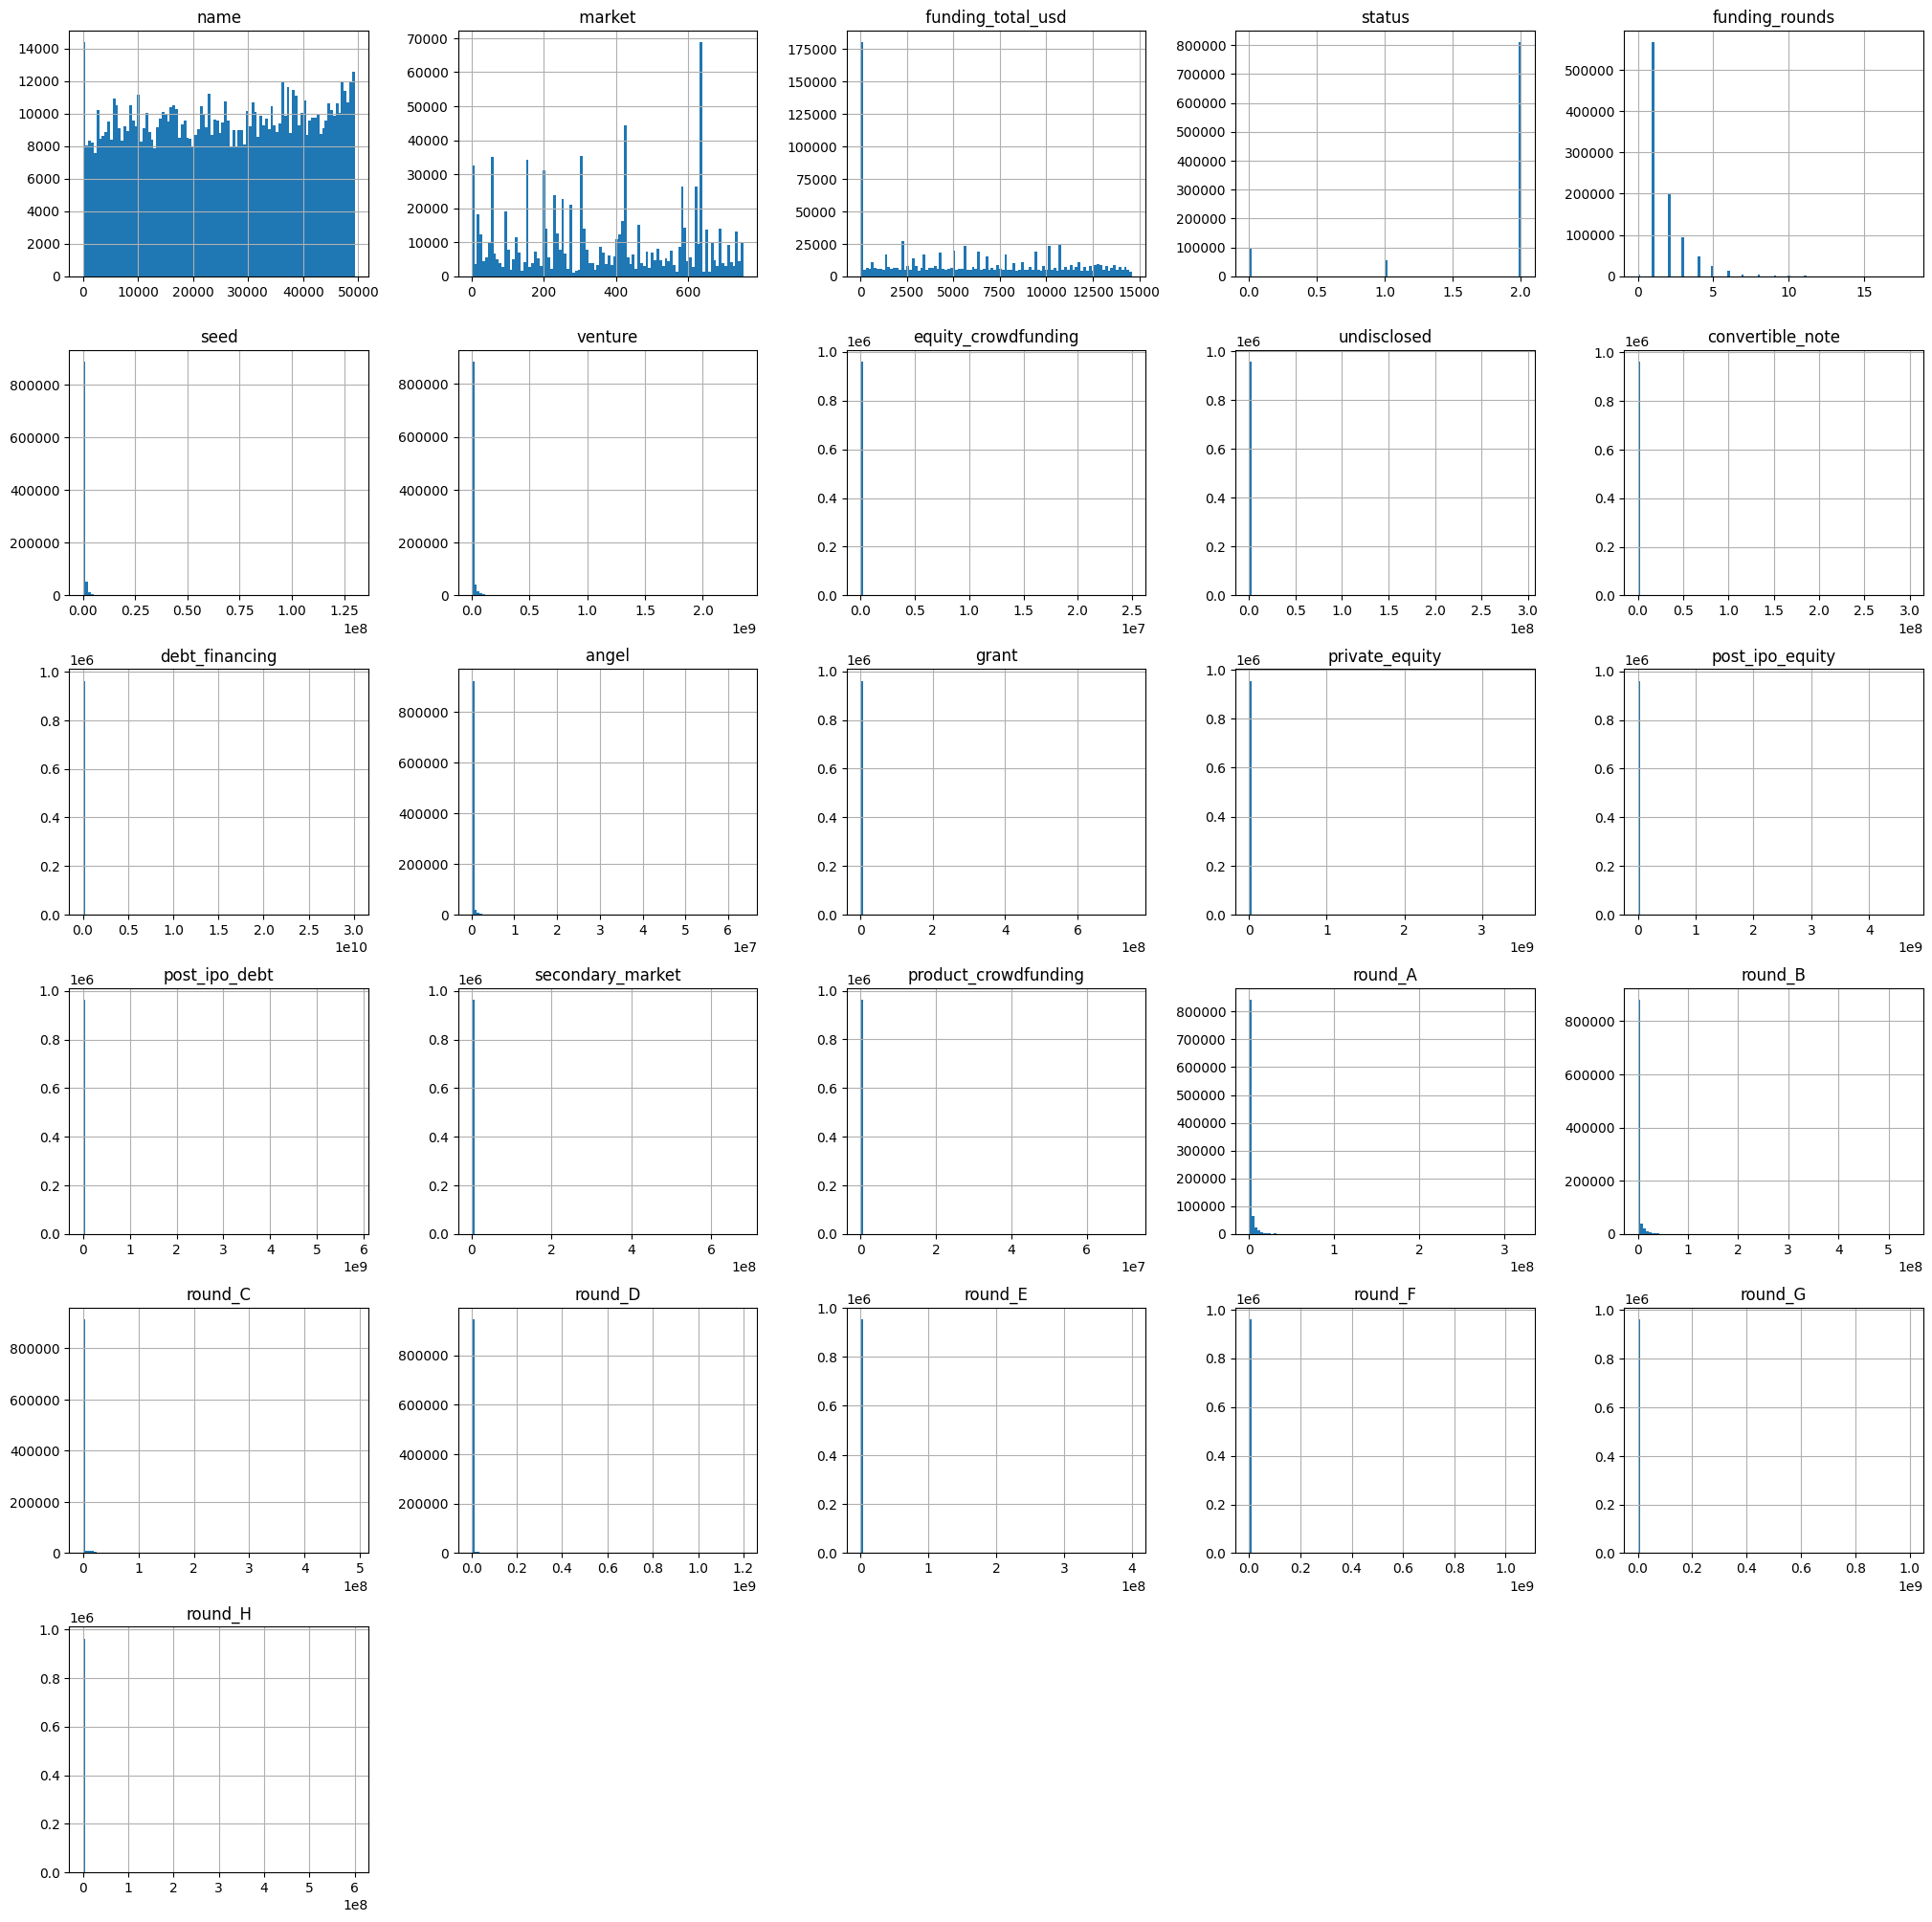

In [12]:
# =======================================================================================================
# Plotting Histograms to visualize the data distribution:
# =======================================================================================================

ax = df.hist(figsize=(25,25), bins=100)
plt.show()
